In [1]:
import os
import re

import pandas as pd
import numpy as np
import unicodedata
import matplotlib.pyplot as plt

import nltk

# Resume

In [3]:
input_path = "data/cdiscount_train.csv.zip"
nb_line=100000  # part totale extraite du fichier initial ici déjà réduit
data_all = pd.read_csv(input_path, sep=",", nrows=nb_line)
data_all = data_all.fillna("") # pour les valeurs nulles
data_all.head()

,Categorie1,Categorie2,Categorie3,Description,Libelle,Marque
0,INFORMATIQUE,CONNECTIQUE - ALIMENTATION,BATTERIE,Batterie Acer Aspire One 751H-52Yr - Li-Ion 11...,Batterie Acer Aspire One 751H-52Yr,AUCUNE
1,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE - BUMPER - FACADE TELEPHONE,Coque rigide Bleu lagon pour ALCATEL OT / 6033...,Coque rigide Bleu lagon pour ALCATEL OT / 6033 …,MUZZANO
2,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE - BUMPER - FACADE TELEPHONE,Facades et coques CELLULAR LINE SHCKGALS 3 MIN...,Facades et coques CELLULAR LINE SHCKGALS 3 MINIP,CELLULAR LINE
3,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE - BUMPER - FACADE TELEPHONE,Coque meteore TPU LG Nexus 4 / E960,Coque meteore TPU LG Nexus 4 / E960,AUCUNE
4,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE - BUMPER - FACADE TELEPHONE,Coque souple Transparente pour LG G FLEX D959 ...,Coque souple Transparente pour LG G FLEX D959 m…,MUZZANO


In [4]:
data = data_all[["Categorie1","Description"]]
data

,Categorie1,Description
0,INFORMATIQUE,Batterie Acer Aspire One 751H-52Yr - Li-Ion 11...
1,TELEPHONIE - GPS,Coque rigide Bleu lagon pour ALCATEL OT / 6033...
2,TELEPHONIE - GPS,Facades et coques CELLULAR LINE SHCKGALS 3 MIN...
3,TELEPHONIE - GPS,Coque meteore TPU LG Nexus 4 / E960
4,TELEPHONIE - GPS,Coque souple Transparente pour LG G FLEX D959 ...
...,...,...
99995,DECO - LINGE - LUMINAIRE,Souvenirs de France - Tour Eiffel Miniature 'P...
99996,LIBRAIRIE,Fast Track to Waste-Free Manufacturing - John ...
99997,TELEPHONIE - GPS,fitBAG Bonga Girafe housse pochette pour télép...
99998,DECO - LINGE - LUMINAIRE,grand tableau minnie T 50x50 cm


In [5]:
#Mardi 4 fevrier

print(data['Categorie1'].describe())
print(data['Categorie1'].value_counts()) #comptage des valeurs

count               100000
unique                  44
top       TELEPHONIE - GPS
freq                 21325
Name: Categorie1, dtype: object
TELEPHONIE - GPS                              21325
INFORMATIQUE                                  14597
LIBRAIRIE                                     12121
VETEMENTS - LINGERIE                           6023
BIJOUX -  LUNETTES - MONTRES                   6014
DECO - LINGE - LUMINAIRE                       5866
AUTO - MOTO (NEW)                              4714
BRICOLAGE - OUTILLAGE - QUINCAILLERIE          3141
SPORT (NEW)                                    2565
ELECTROMENAGER                                 2152
JOUET (NEW)                                    2038
BAGAGERIE                                      1912
CULTURE / JEUX                                 1819
PHOTO - OPTIQUE                                1574
CHAUSSURES - ACCESSOIRES                       1391
MEUBLE                                         1383
HYGIENE - BEAUTE - PARFUM   

KeyboardInterrupt: 

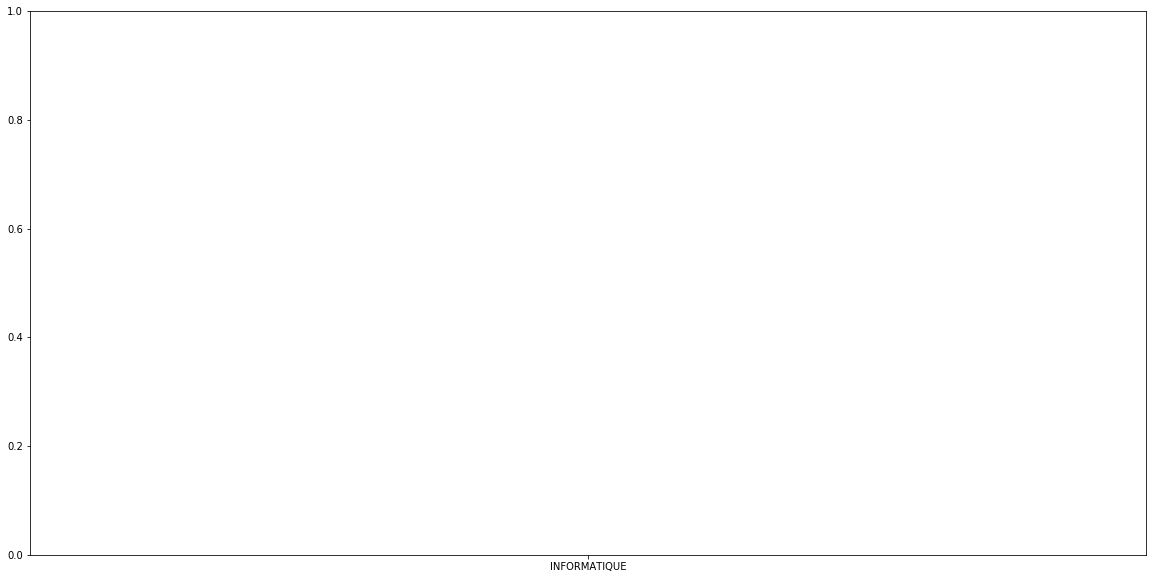

In [6]:
counts=data['Categorie1'].value_counts().tolist() #nb occurence
category=data['Categorie1'].value_counts().keys().tolist() #nom des categories


fig=plt.figure(figsize=(20,10))
data['Categorie1'].hist(bins=44)
fig.autofmt_xdate()

In [ ]:
nbv=[]
mean=0
for k in range(100000):
    nbv+=[data['Description'][k].count(' ')+1]
    mean+=data['Description'][k].count(' ')+1
    

Question : print(data.['Description'].describe() / par catégorie/produit ??

In [ ]:
data[data["Categorie1"]=="TELEPHONIE - GPS"].describe()

In [ ]:
#print(data['Description'][0])
#nb0=data['Description'][0].count(' ')
#print(nb0+1)

for k in range(10):
    print(nbv[k])

print("Taille moyenne du voc :", int(mean)/100000 , " mots")

In [23]:
l = [1,2,3,3,2]
set(l)

{1, 2, 3}

In [7]:
## Attraper les string d'une fiche produit
des = data['Description'][0]
desc = des.split(' ')
print("Nombre d'occurences dans la fiche produit 0 :", len(desc) ,"mots")    

Nombre d'occurences dans la fiche produit 0 : 16 mots


In [8]:
for k in range(10):
    des = data['Description'][k]
    desc = des.split(' ')
    
    print("Nombre d'occurences dans la fiche produit" ,k," :", len(desc) ,"mots ", len(set(desc)), ' unique' )


Nombre d'occurences dans la fiche produit 0  : 16 mots  16  unique
Nombre d'occurences dans la fiche produit 1  : 35 mots  26  unique
Nombre d'occurences dans la fiche produit 2  : 25 mots  22  unique
Nombre d'occurences dans la fiche produit 3  : 9 mots  9  unique
Nombre d'occurences dans la fiche produit 4  : 33 mots  25  unique
Nombre d'occurences dans la fiche produit 5  : 17 mots  15  unique
Nombre d'occurences dans la fiche produit 6  : 21 mots  18  unique
Nombre d'occurences dans la fiche produit 7  : 39 mots  32  unique
Nombre d'occurences dans la fiche produit 8  : 26 mots  25  unique
Nombre d'occurences dans la fiche produit 9  : 20 mots  18  unique


In [11]:
## Questions ##    
#trouver les doubles dans chaque produit
#pondération des occurences en fonction de leur fréquence par catégorie
#ordre alphabétique ?
#trouver le nb moyen d'occurences par catégorie 

In [9]:
i = 0
txt = data['Description'].values[i]
print("Original Description : " + data['Description'])

0        Original Description : Batterie Acer Aspire On...
1        Original Description : Coque rigide Bleu lagon...
2        Original Description : Facades et coques CELLU...
3        Original Description : Coque meteore TPU  LG N...
4        Original Description : Coque souple Transparen...
                               ...                        
99995    Original Description : Souvenirs de France - T...
99996    Original Description : Fast Track to Waste-Fre...
99997    Original Description : fitBAG Bonga Girafe hou...
99998    Original Description : grand tableau minnie T ...
99999    Original Description : Étui en cuir avec empla...
Name: Description, Length: 100000, dtype: object


In [21]:
txt = txt.lower()
print(txt)
len(set(txt.split(" ")))

batterie acer aspire one    h   yr   li ion     v     mah    wh noir  compatible batterie  voir la presentation


17

In [23]:
txt = txt.replace(u'\u2026','.')    
txt = txt.replace(u'\u00a0',' ')
print(txt)

batterie acer aspire one    h   yr   li ion     v     mah    wh noir  compatible batterie  voir la presentation


In [12]:
txt = unicodedata.normalize('NFD', txt).encode('ascii', 'ignore').decode("utf-8")
print(txt)

batterie acer aspire one 751h-52yr - li-ion 11.1v 5200mah, 54wh noir, compatible batterie. voir la presentation


In [13]:
txt = re.sub('[^a-z_]', ' ', txt)
print(txt)

batterie acer aspire one    h   yr   li ion     v     mah    wh noir  compatible batterie  voir la presentation


In [16]:
## listes de mots à supprimer dans la description des produits
## Depuis NLTK
nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words('french') 

stopwords[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/cecile/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle']

In [17]:
stopwords = [unicodedata.normalize('NFD', sw).encode('ascii', 'ignore').decode("utf-8") for sw in stopwords]
stopwords[:10]

['au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle']

In [18]:
tokens = [w for w in txt.split() if (len(w)>2) and (w not in stopwords)]
removed_words = [w for w in txt.split() if (len(w)<2) or (w in stopwords)]

print(tokens)
print(removed_words)

['batterie', 'acer', 'aspire', 'one', 'ion', 'mah', 'noir', 'compatible', 'batterie', 'voir', 'presentation']
['h', 'v', 'la']


In [19]:
## Fonction de setmming de stemming permettant la racinisation
stemmer=nltk.stem.SnowballStemmer('french')
tokens_stem = [stemmer.stem(token) for token in tokens]
print(tokens_stem)

['batter', 'acer', 'aspir', 'one', 'ion', 'mah', 'noir', 'compatibl', 'batter', 'voir', 'present']


In [22]:
set(tokens_stem)

{'acer',
 'aspir',
 'batter',
 'compatibl',
 'ion',
 'mah',
 'noir',
 'one',
 'present',
 'voir'}